## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
model2 = build_mlp()

#optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

In [11]:
"""
設定要訓練的 Epoch 數
"""
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.0411 - acc: 0.2757 - val_loss: 1.9754 - val_acc: 0.2688
Epoch 2/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.8717 - acc: 0.3416 - val_loss: 1.8710 - val_acc: 0.3327
Epoch 3/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.8021 - acc: 0.3670 - val_loss: 1.8271 - val_acc: 0.3419
Epoch 4/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.7581 - acc: 0.3844 - val_loss: 1.7539 - val_acc: 0.3781
Epoch 5/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.7229 - acc: 0.3957 - val_loss: 1.7315 - val_acc: 0.3858
Epoch 6/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.6951 - acc: 0.4057 - val_loss: 1.6783 - val_acc: 0.4077
Epoch 7/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.6705 - acc: 0.4147 - val_loss: 1.8

50000/50000 [==============================] - 5s 95us/step - loss: 1.1819 - acc: 0.5850 - val_loss: 1.3815 - val_acc: 0.5072
Epoch 60/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1716 - acc: 0.5904 - val_loss: 1.3976 - val_acc: 0.5032
Epoch 61/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.1696 - acc: 0.5924 - val_loss: 1.4369 - val_acc: 0.4861
Epoch 62/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1603 - acc: 0.5944 - val_loss: 1.4617 - val_acc: 0.4816
Epoch 63/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1558 - acc: 0.5959 - val_loss: 1.3856 - val_acc: 0.5082
Epoch 64/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1510 - acc: 0.5995 - val_loss: 1.3432 - val_acc: 0.5234
Epoch 65/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1458 - acc: 0.6005 - val_loss: 1.4421 - val_acc: 0.4844
Epoch 66/500
50000/50000 [=============

Epoch 118/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.8592 - acc: 0.7039 - val_loss: 1.4772 - val_acc: 0.5143
Epoch 119/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.8622 - acc: 0.6989 - val_loss: 1.4509 - val_acc: 0.5147
Epoch 120/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.8554 - acc: 0.7035 - val_loss: 1.5319 - val_acc: 0.4967
Epoch 121/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8437 - acc: 0.7092 - val_loss: 1.4033 - val_acc: 0.5201
Epoch 122/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.8463 - acc: 0.7061 - val_loss: 1.4578 - val_acc: 0.5101
Epoch 123/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.8404 - acc: 0.7080 - val_loss: 1.3736 - val_acc: 0.5356
Epoch 124/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8355 - acc: 0.7098 - val_loss: 1.4829 - val_acc: 0.4992
Epoch 125/500
5000

50000/50000 [==============================] - 5s 99us/step - loss: 0.5877 - acc: 0.8011 - val_loss: 1.7912 - val_acc: 0.4878
Epoch 177/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.5735 - acc: 0.8044 - val_loss: 1.6288 - val_acc: 0.5160
Epoch 178/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.5566 - acc: 0.8147 - val_loss: 2.0714 - val_acc: 0.4652
Epoch 179/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.5682 - acc: 0.8078 - val_loss: 2.0571 - val_acc: 0.4697
Epoch 180/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.5687 - acc: 0.8099 - val_loss: 1.5878 - val_acc: 0.5315
Epoch 181/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.5600 - acc: 0.8108 - val_loss: 1.7823 - val_acc: 0.4992
Epoch 182/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.5529 - acc: 0.8141 - val_loss: 1.9264 - val_acc: 0.4766
Epoch 183/500
50000/50000 [=====

50000/50000 [==============================] - 6s 114us/step - loss: 0.3228 - acc: 0.9006 - val_loss: 1.9414 - val_acc: 0.5201
Epoch 235/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.3213 - acc: 0.8995 - val_loss: 1.9634 - val_acc: 0.5267
Epoch 236/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.3500 - acc: 0.8946 - val_loss: 1.9601 - val_acc: 0.5086
Epoch 237/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.2987 - acc: 0.9083 - val_loss: 1.9031 - val_acc: 0.5392
Epoch 238/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.3015 - acc: 0.9101 - val_loss: 2.0382 - val_acc: 0.5209
Epoch 239/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.3408 - acc: 0.8937 - val_loss: 1.9424 - val_acc: 0.5329
Epoch 240/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2816 - acc: 0.9149 - val_loss: 1.9921 - val_acc: 0.5202
Epoch 241/500
50000/50000 [=

50000/50000 [==============================] - 5s 98us/step - loss: 0.1190 - acc: 0.9725 - val_loss: 2.2063 - val_acc: 0.5396
Epoch 293/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.1809 - acc: 0.9578 - val_loss: 2.2967 - val_acc: 0.5283
Epoch 294/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.1111 - acc: 0.9765 - val_loss: 4.8961 - val_acc: 0.3484
Epoch 295/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.3866 - acc: 0.8983 - val_loss: 2.2078 - val_acc: 0.5247
Epoch 296/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1593 - acc: 0.9631 - val_loss: 2.2266 - val_acc: 0.5349
Epoch 297/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.1040 - acc: 0.9783 - val_loss: 2.2643 - val_acc: 0.5416
Epoch 298/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.1027 - acc: 0.9783 - val_loss: 2.2677 - val_acc: 0.5347
Epoch 299/500
50000/50000 [=

50000/50000 [==============================] - 6s 120us/step - loss: 0.0352 - acc: 0.9966 - val_loss: 2.5993 - val_acc: 0.5410
Epoch 351/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0349 - acc: 0.9967 - val_loss: 2.6177 - val_acc: 0.5403
Epoch 352/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0356 - acc: 0.9963 - val_loss: 5.7786 - val_acc: 0.3688
Epoch 353/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.5184 - acc: 0.8957 - val_loss: 2.5920 - val_acc: 0.5358
Epoch 354/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0459 - acc: 0.9945 - val_loss: 2.6085 - val_acc: 0.5348
Epoch 355/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0412 - acc: 0.9953 - val_loss: 2.7378 - val_acc: 0.5229
Epoch 356/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1387 - acc: 0.9778 - val_loss: 3.4013 - val_acc: 0.3954
Epoch 357/500
50000/50000 [

50000/50000 [==============================] - 5s 99us/step - loss: 0.0147 - acc: 0.9996 - val_loss: 2.8607 - val_acc: 0.5386
Epoch 409/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0142 - acc: 0.9996 - val_loss: 2.8732 - val_acc: 0.5416
Epoch 410/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0141 - acc: 0.9994 - val_loss: 2.8702 - val_acc: 0.5410
Epoch 411/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0139 - acc: 0.9995 - val_loss: 2.8670 - val_acc: 0.5403
Epoch 412/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0140 - acc: 0.9994 - val_loss: 2.9217 - val_acc: 0.5404
Epoch 413/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0140 - acc: 0.9994 - val_loss: 2.8889 - val_acc: 0.5392
Epoch 414/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0131 - acc: 0.9997 - val_loss: 2.8999 - val_acc: 0.5416
Epoch 415/500
50000/50000 [=====

50000/50000 [==============================] - 5s 97us/step - loss: 0.0090 - acc: 0.9999 - val_loss: 2.9965 - val_acc: 0.5377
Epoch 467/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0089 - acc: 0.9999 - val_loss: 2.9877 - val_acc: 0.5357
Epoch 468/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 3.0016 - val_acc: 0.5389
Epoch 469/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 3.0095 - val_acc: 0.5398
Epoch 470/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0087 - acc: 0.9999 - val_loss: 3.0126 - val_acc: 0.5398
Epoch 471/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0084 - acc: 0.9999 - val_loss: 3.0141 - val_acc: 0.5394
Epoch 472/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0084 - acc: 0.9999 - val_loss: 3.0156 - val_acc: 0.5381
Epoch 473/500
50000/50000 [======

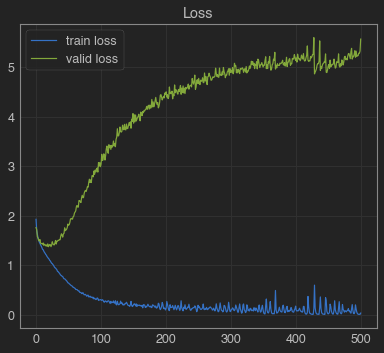

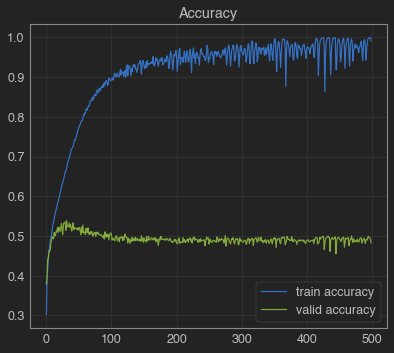

In [9]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

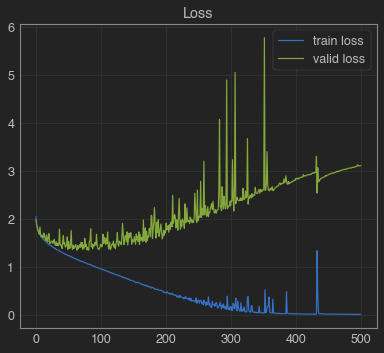

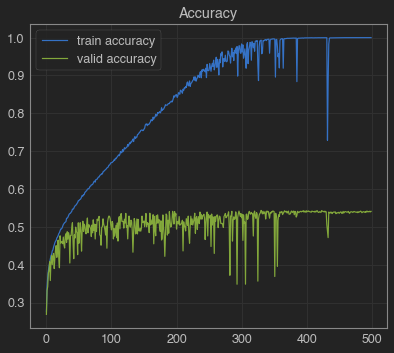

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()